## Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import dexplot as dxp
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
#import pickle 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
raw_df = pd.read_csv("heart_2020_cleaned.csv")
df= raw_df.copy()
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## BASIC EDA

In [3]:
df.dtypes.value_counts()

object     14
float64     4
dtype: int64

In [4]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [5]:
df.shape

(319795, 18)

In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
cls_yes = ['Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']

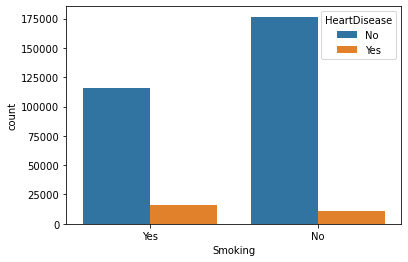

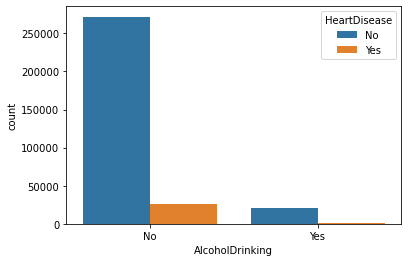

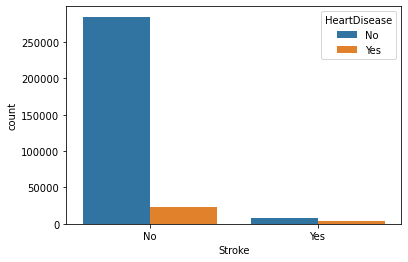

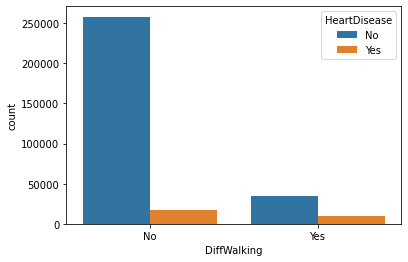

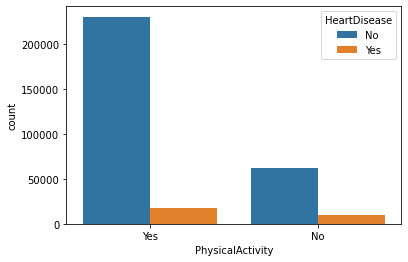

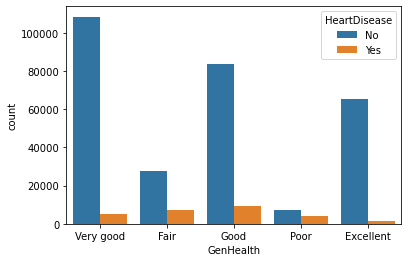

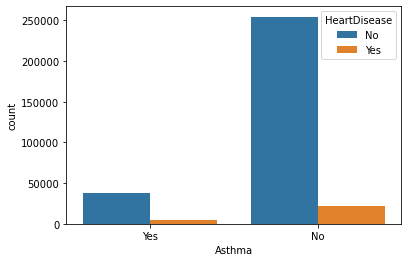

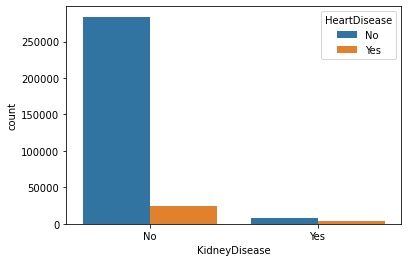

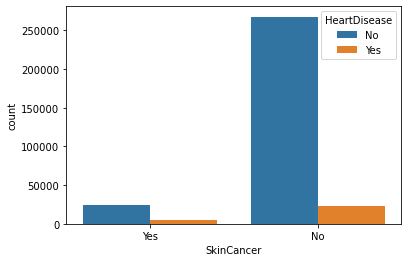

In [11]:
for i in cls_yes:
    sns.countplot(df[i],hue="HeartDisease",data=df)
    plt.show()

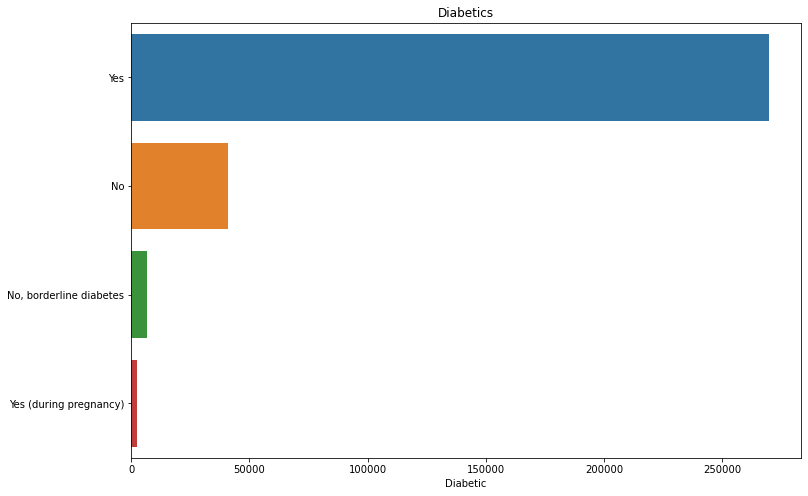

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(df["Diabetic"].value_counts(),df["Diabetic"].unique())
plt.title("Diabetics")
plt.show()

In [13]:
cls_enc = ['HeartDisease','Sex','Race','Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer','Diabetic','AgeCategory']

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
for i in cls_enc:
    df[i] = le.fit_transform(df[i])

In [17]:
for i in cls_enc:
    print(i+" ----> ",end=" ")
    print(df[i].unique())

HeartDisease ---->  [0 1]
Sex ---->  [0 1]
Race ---->  [5 2 1 0 4 3]
Smoking ---->  [1 0]
AlcoholDrinking ---->  [0 1]
Stroke ---->  [0 1]
DiffWalking ---->  [0 1]
PhysicalActivity ---->  [1 0]
GenHealth ---->  [4 1 2 3 0]
Asthma ---->  [1 0]
KidneyDisease ---->  [0 1]
SkinCancer ---->  [1 0]
Diabetic ---->  [2 0 1 3]
AgeCategory ---->  [ 7 12  9 11  4 10  8  6  5  0  3  2  1]


### Questions?

## How many Smokers have heart Disease?

In [18]:
Asthma_And_Hear_Disease = 0
for i,z in zip(raw_df["Smoking"],raw_df["HeartDisease"]):
    if i == "Yes":
        if z == "Yes":
            Asthma_And_Hear_Disease = Asthma_And_Hear_Disease + 1
print("The smokers having HeartDisease is :" ,Asthma_And_Hear_Disease)

The smokers having HeartDisease is : 16037


## HOW MANY DIABETIC HAVE HEART DISEASE?

In [19]:

Diabetic_And_Hear_Disease = 0
for i,z in zip(raw_df["Diabetic"],raw_df["HeartDisease"]):
    if i == "Yes":
        if z == "Yes":
            Diabetic_And_Hear_Disease = Diabetic_And_Hear_Disease + 1
print("The diabetic patients having HeartDisease is :" ,Diabetic_And_Hear_Disease)

The diabetic patients having HeartDisease is : 8957


## Which category of age have most heart disease patients?

In [20]:
pd.crosstab(raw_df["AgeCategory"],raw_df["HeartDisease"] == "Yes")

HeartDisease,False,True
AgeCategory,,
18-24,20934,130
25-29,16822,133
30-34,18527,226
35-39,20254,296
40-44,20520,486
45-49,21047,744
50-54,23999,1383
55-59,27555,2202
60-64,30359,3327


## Checking For Corelation

In [21]:
cr = df.corr()
cr

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


<AxesSubplot:>

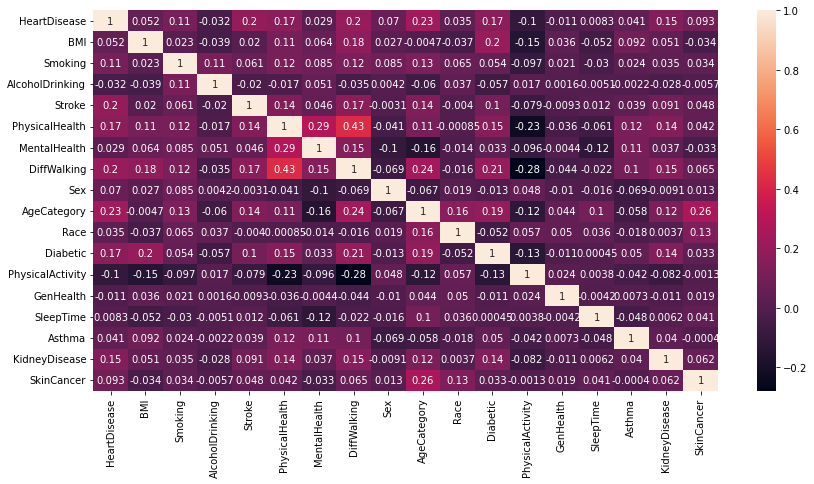

In [22]:
plt.figure(figsize=(14,7))
sns.heatmap(cr,annot=True)

## Features that are correlated with heart disease?

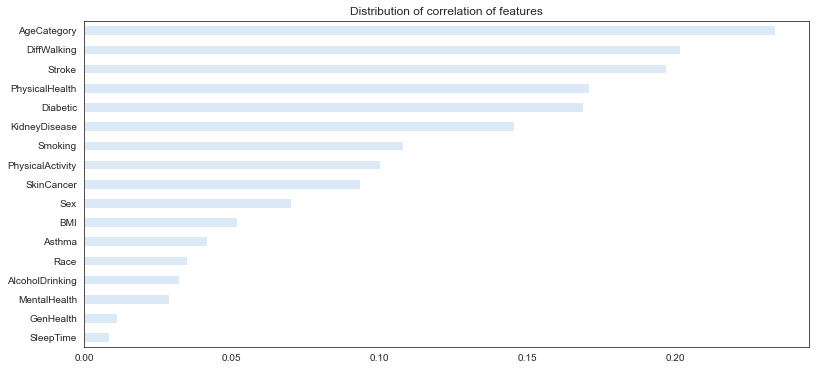

In [24]:
sns.set_style('white')
sns.set_palette('Blues')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(cr['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

In [25]:
x = df.drop("HeartDisease",axis=1)
y = df["HeartDisease"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [30]:
logistic = LogisticRegression()
random = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [31]:
models = [dt,knn,logistic,random]
#x = {}
for i in models:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,"accuracy score is : ",accuracy_score(ypred,y_test))
    print(classification_report(ypred,y_test))
    print("____________________________________________________________________")

DecisionTreeClassifier() accuracy score is :  0.8628809080817399
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     57975
           1       0.24      0.22      0.23      5984

    accuracy                           0.86     63959
   macro avg       0.58      0.58      0.58     63959
weighted avg       0.86      0.86      0.86     63959

____________________________________________________________________
KNeighborsClassifier() accuracy score is :  0.907128003877484
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     62619
           1       0.08      0.32      0.13      1340

    accuracy                           0.91     63959
   macro avg       0.53      0.62      0.54     63959
weighted avg       0.97      0.91      0.93     63959

____________________________________________________________________
LogisticRegression() accuracy score is :  0.9149298769524227
              precis

## CHECKING IMBALANCE OF DATA

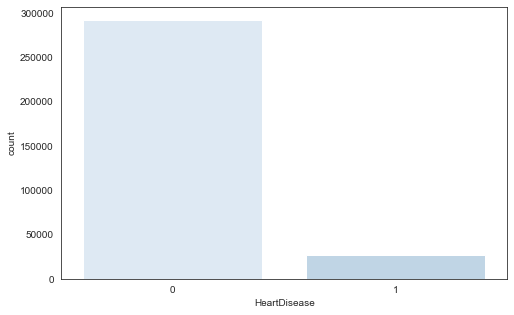

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(df["HeartDisease"])
plt.show()

In [33]:
## Data is highly imbalanced
!pip install imbalanced-learn

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
smote = SMOTE(sampling_strategy='minority')

In [37]:
x_sm,y_sm = smote.fit_resample(x,y)

In [38]:
y_sm.value_counts()

0    292422
1    292422
Name: HeartDisease, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=12,stratify=y_sm)

In [40]:
y_train.value_counts()

0    233938
1    233937
Name: HeartDisease, dtype: int64

In [41]:
models = [dt,knn,logistic,random]
for i in models:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,"accuracy score is : ",accuracy_score(ypred,y_test))
    print(classification_report(ypred,y_test))
    print("____________________________________________________________________")

DecisionTreeClassifier() accuracy score is :  0.873889663073122
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     56805
           1       0.89      0.86      0.88     60164

    accuracy                           0.87    116969
   macro avg       0.87      0.87      0.87    116969
weighted avg       0.87      0.87      0.87    116969

____________________________________________________________________
KNeighborsClassifier() accuracy score is :  0.8531405757080937
              precision    recall  f1-score   support

           0       0.75      0.95      0.84     46122
           1       0.96      0.79      0.87     70847

    accuracy                           0.85    116969
   macro avg       0.85      0.87      0.85    116969
weighted avg       0.88      0.85      0.85    116969

____________________________________________________________________
LogisticRegression() accuracy score is :  0.7349297677162325
              precis

In [ ]:
user_input=input("Enter the values one by one")
user_input=user_input.split(",")


for i in range(len(user_input)):
    # convert each item to int type
    user_input[i] = float(user_input[i])

user_input=np.array(user_input)
user_input=user_input.reshape(1,-1)
#user_input=scal.transform(user_input)
RF_Y_pred=random.predict(user_input)
if(RF_Y_pred[0]==0):
 print("You have no chances of getting a heart disease!")
else:
  print("Warning!!!You have chances to get a heart disease!")

In [ ]:
import pickle as pkl
pkl.dump(random,open("finalDump.p","wb"))